In [157]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import glob
import dataframe_image as dfi

import pycountry


# Ranking Melhores Universidades (2011_2024)

# Times Higher Education

Times higher education é uma revista britânica que trata sobre assuntos relacionados a educação superior. Ela publica rankings anuais que classificam as melhores universidades ao redor do mundo.

Sobre os dados:

The THE World University Rankings provide the definitive list of the world’s best universities, with an emphasis on the research mission. It is the only global university league table to judge research-intensive universities across all of their core missions: teaching (the learning environment); research (volume, income and reputation); citations (research influence); industry income (knowledge transfer) and international outlook (staff, students and research). It uses 13 carefully calibrated performance indicators to provide the most comprehensive and balanced comparisons. The overall list is accompanied by 11 subject-specific rankings.

Original data, as well as ranking methodology described per each year, is available on the official website www.timeshighereducation.com
 Methodology (2024): https://www.timeshighereducation.com/world-university-rankings/world-university-rankings-2024-methodology


 Cinco fatores foram considerados para a contrução dos rankings, são eles:
 Fonte: https://www.timeshighereducation.com/student/news/how-use-rankings-frequently-asked-questions


- Teaching is a measure of the learning experience and quality at a university. It is based on the reputation among academics, and statistics about staff, students and research (peso 0.3);
- Research is a measure of both the quality and quantity of research output, based on reputation, research income and productivity (peso 0.3);
- Citations measures how influential that research is, and counts the number of times work published by academics at the university is cited in other papers (peso 0.3);
- International Outlook measures the environment and attitude with respect to international students, staff and research. It is based on international-to-domestic ratios across staff, students and research collaborations (peso 0.075);
- Innovation or Industry Income is a measure of innovation at a university, based on how much the university earns from its inventions and industrial work (peso 0.025).



## Carregar Dados


In [158]:
#Link para download dos dados: https://www.kaggle.com/datasets/r1chardson/the-world-university-rankings-2011-2023

path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data'
path_the=path+'/dados/THE World University Rankings 2011-2024' #caminho onde estão salvos os dados
files_the=glob.glob(path_the+'/*.csv')
files_the
# o path de cada arquivo é semelhante, mudando somente o ano

['/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/THE World University Rankings 2011-2024/2015_rankings.csv',
 '/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/THE World University Rankings 2011-2024/2019_rankings.csv',
 '/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/THE World University Rankings 2011-2024/2024_rankings.csv',
 '/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/THE World University Rankings 2011-2024/2011_rankings.csv',
 '/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/THE World University Rankings 2011-2024/2016_rankings.csv',
 '/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/THE World University Rankings 2011-2024/2014_rankings.csv',
 '/home/rodolfo/

In [159]:
dados={} #dicionário que receberá os dados dos rankings entre 2011 e 2024, cada key no dicionário será um ano
anos=[str(ano) for ano in range(2011,2025,1)] #strings com os anos que serão usadas na contrução do dicionário
colunas_ano={} #dicinário com as colunas presentes nos rankings de cada ano. Será criado para avaliar se as métricas são as mesmas em todos os rankings
                #nesse dicionário as keys são os anos dos rankings e os valores as colunas presentes nos rankings
for ano in anos:
    dados[ano]=pd.read_csv(path_the+'/'+ano+'_rankings.csv')  #dados carregados no dicionário
    colunas_ano[ano]=dados[ano].columns.to_list()

## Análise Exploratória

In [160]:
#Nem todas as métricas estão presentes em todos os rankings
#Novas métricas foram adicionadas com o passar dos anos
for ano in anos:
    print('{}: {} colunas'.format(ano,len(colunas_ano[ano])))

2011: 20 colunas
2012: 20 colunas
2013: 20 colunas
2014: 20 colunas
2015: 20 colunas
2016: 24 colunas
2017: 24 colunas
2018: 24 colunas
2019: 24 colunas
2020: 24 colunas
2021: 24 colunas
2022: 24 colunas
2023: 24 colunas
2024: 25 colunas


In [161]:
#Número de Universidade avaliadas em cada ano:
#O ranking vem crescendo ao longo dos anos
for ano in anos:
    print('{}: {} universidades no ranking)'.format(ano,len(dados[ano])))

2011: 200 universidades no ranking)
2012: 402 universidades no ranking)
2013: 400 universidades no ranking)
2014: 400 universidades no ranking)
2015: 401 universidades no ranking)
2016: 800 universidades no ranking)
2017: 981 universidades no ranking)
2018: 1103 universidades no ranking)
2019: 1258 universidades no ranking)
2020: 1397 universidades no ranking)
2021: 1526 universidades no ranking)
2022: 2112 universidades no ranking)
2023: 2345 universidades no ranking)
2024: 2671 universidades no ranking)


Descrição das métricas (colunas nos dataframes): 

Nem todas as métricas estão presentes em todos os rankings, porque a metodoligia foi alterada ao longo dos anos. Para maiores detalhes consultar https://www.timeshighereducation.com/world-university-rankings/world-university-rankings-2024-methodology


- rank_order: posição geral da universidade, considerando todas as notas atribuídas;
- rank;
- name: nome da universidade;
- scores_overall: pontuação média da universidade considerando todas a métricas;
- scores_overall_rank: ranking da universidade considerando o overall score;
- scores_teaching: pontuacao atribuída para ensino;
- scores_teaching_rank: rankeamento de acordo com o score para ensino;
- scores_international_outlook: nível de internacionalização da universidade, mede a capacidade da universidade de atrair estudantes estrangeiros;
- scores_international_outlook_rank: rankeamento de acordo com o nível de internacionalização;
- scores_industry_income: mede o impacto comercial da pesquisa produzida;
- scores_industry_income_rank:  ranking criado de acordo com o scores_industry_income;
- scores_research :avaliação da qualidade da pesquisa realizada na universidade;
- scores_research_rank: ranking criado de acordo com o scores_research;
- scores_citations :pontuação atribuída para medir a quantidade de citações recebidas pelos trabalhos produzidos na universidade;
- scores_citations_rank: ranking criado de acordo com scores_citations;
- location: localização da universidade;
- aliases; 
- subjects_offered': cursos oferecidos;
- closed: se a universidade está ou não fechada;
- unaccredited : universidade possui ou não credenciamento formal;
- stats_proportion_of_isr: intedisciplinidade;
- stats_female_male_ratio: proporção entre mulheres e homens;
- stats_pc_intl_students;
- stats_student_staff_ratio: proporção entre o número estudantes e de funcionários;
- stats_number_students: número de estudantes.



In [162]:
#Conversão do dicionário em dataframe
#Um único dataframe com os dados de todos os rankings para facilitar a manipulação dos dados
'''
- df_dados é um dataframe com os rankings de 2011 até 2024;
- O primeiro index de df_dados é o ano do ranking. O ranking de cada ano está ordenado de acordo com a posição das universidade no ranking, 
  da primeira até a última;
- As métricas ausentes em certos rankings foram preenchidas com nan (not a number)
'''

df_dados=pd.concat(dados,axis=0)


In [163]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15996 entries, ('2011', np.int64(0)) to ('2024', np.int64(2670))
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         15996 non-null  int64  
 1   rank                               15996 non-null  object 
 2   name                               15996 non-null  object 
 3   scores_overall                     14235 non-null  object 
 4   scores_overall_rank                15996 non-null  int64  
 5   scores_teaching                    14235 non-null  float64
 6   scores_teaching_rank               15996 non-null  int64  
 7   scores_international_outlook       14235 non-null  object 
 8   scores_international_outlook_rank  15996 non-null  int64  
 9   scores_industry_income             14235 non-null  object 
 10  scores_industry_income_rank        15996 non-null  int64  
 11  scores_research

In [164]:
#ranking publicado em 2024
df_dados.loc['2024',:].head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,location,aliases,subjects_offered,closed,unaccredited,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr
0,10,1,University of Oxford,98.5,10,96.6,5,97.5,14,98.7,...,United Kingdom,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,"21,750",10.9,42%,49 : 51,23%
1,20,2,Stanford University,98.0,20,99.0,1,87.0,168,100.0,...,United States,Stanford University,"Computer Science,Communication & Media Studies...",False,False,"14,517",6.4,23%,47 : 53,22%
2,30,3,Massachusetts Institute of Technology,97.9,30,98.6,2,93.8,66,100.0,...,United States,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False,False,"11,085",8.0,33%,41 : 59,40%
3,40,4,Harvard University,97.8,40,97.7,3,90.8,120,84.2,...,United States,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,"20,050",9.0,25%,51 : 49,12%
4,50,5,University of Cambridge,97.5,50,95.8,7,97.4,15,87.9,...,United Kingdom,University of Cambridge,Politics & International Studies (incl Develop...,False,False,"20,565",11.5,38%,48 : 52,27%


In [165]:
#criar duas novas colunas, uma com a porcentagem de homens e outra com a porcentagem de mulheres para facilitar a análise dos dados
#No dataframe a proporção entre homens e mulheres está como uma string no seguiote formato: '49:51'
df_dados=pd.concat([df_dados,df_dados['stats_female_male_ratio'].str.split(':',expand=True)],axis=1)
df_dados.rename(columns={0:'male proportion',1:'female proportion'},inplace=True)

In [166]:
df_dados.loc['2024',:].head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,subjects_offered,closed,unaccredited,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,male proportion,female proportion
0,10,1,University of Oxford,98.5,10,96.6,5,97.5,14,98.7,...,"Geography,Chemistry,Chemical Engineering,Biolo...",False,False,"21,750",10.9,42%,49 : 51,23%,49,51
1,20,2,Stanford University,98.0,20,99.0,1,87.0,168,100.0,...,"Computer Science,Communication & Media Studies...",False,False,"14,517",6.4,23%,47 : 53,22%,47,53
2,30,3,Massachusetts Institute of Technology,97.9,30,98.6,2,93.8,66,100.0,...,"Architecture,Economics & Econometrics,Archaeol...",False,False,"11,085",8.0,33%,41 : 59,40%,41,59
3,40,4,Harvard University,97.8,40,97.7,3,90.8,120,84.2,...,"Sociology,Architecture,Physics & Astronomy,Psy...",False,False,"20,050",9.0,25%,51 : 49,12%,51,49
4,50,5,University of Cambridge,97.5,50,95.8,7,97.4,15,87.9,...,Politics & International Studies (incl Develop...,False,False,"20,565",11.5,38%,48 : 52,27%,48,52


In [167]:
#Transformar os dados em valores numéricos
#Converter o formato dos dados nas colunas male proportion e female proportion
df_dados['male proportion']=df_dados['male proportion'].astype('float64',errors='ignore',copy=True)
df_dados['female proportion']=df_dados['female proportion'].astype('float64',errors='ignore',copy=True)

In [168]:
#Remover as virgulas na coluna stats_number_students
#Nessa coluna estão os números de estudantes em cada universidade, portanto são números inteiros
#Conversão do formato dos dados

df_dados['stats_number_students']=df_dados['stats_number_students'].str.replace(',','')
df_dados['stats_number_students']=df_dados['stats_number_students'].astype('float64',errors='ignore',copy=True)

In [169]:
'''
Os rankings anuais contam com indicadores e também com rankings baseados nesses indicadores. São eles:

scores_overall
scores_overall_rank

scores_teaching
scores_teaching_rank

scores_international_outlook 
scores_international_outlook_rank

scores_industry_income
scores_industry_income_rank

scores_research
scores_research_rank

scores_citations
scores_citations_rank

Os valores para certos indicadores estão ausentes para algumas universidades (valor para indicador está como nan (not a number)). Porém 
quando o valor do indicador está nan, o valor para o ranking do indicador não está como nan. Por exemplo, certas universidades tem valor nan 
para research_score, porém os valores para scores_research_rank estão nulos (inteiro zero). Isso cria um problema quando se tenta ordenar os dados de acordo 
com scores_research_rank, porque certos valores nessa coluna não fazem sentido. Sendo assim quando o valor de um dos indicadores listados 
acima for nan para uma universidade, o valor do respectivo  rank será convertido para nan.
'''

indicadores=['scores_overall','scores_teaching','scores_international_outlook','scores_industry_income','scores_research','scores_citations']
for indicador in indicadores:
    df_dados.loc[df_dados[indicador].isna(),[indicador+'_rank']]=np.nan

## Análise dos Rankings 

### Melhores colocadas ao longo dos anos

Criação de um dataframe com as universidades melhores colocadas nos rankings de cada ano

In [170]:
def select_top_ranking(dados,feature,n_top,anos_selecionados):
    '''
    Função que seleciona as n primeiras linhas do ranking de cada ano (melhores colocadas na classificação). 
    O dataframe dados tem os rankings das universidades entre 2001 a 2024. Os rankings de cada ano estão ordenados de acordo com as posições das 
    universidades no ranking, começando pelo primeiromlugar. O dataframe retornado terá o valor da feature desejada para as n_top universidades melhores colocadas nos rankings de cada ano.
    Por exemplo, se feature=name e n_top=9, a função retornará um dataframe com os nomes das universidade que oucuparam as 10 primeiras posições do ranking em cada ano.

    Inputs:
        dados   - Pandas dataframe com  os rankings
        feature - (str) feature desejada. É uma das colunas presente no dataframe
        n_top   - (int) Número de linhas que serão selecionadas. 
        anos_seleciondados - lista com anos em formato string. Definirá os ranking que se deseja analisar. Estão disponíveis os rankings entre os de 2011 e 2024 
    Output:
        Pandas dataframe onde em cada linha estão os valores da feature selecionada para um ano e nas colunas os valores para as n_top universidades melhores colocadas no ranking.
        Por exemplo, caso a feature selecionada seja o nome da universidade, na primeira linha poderia estar o ano 2011, na segunda 2012 e assim pordiante. Na primeira coluna
        o nome da univerisidade melhor colocada, na segunda coluna a segunda universidade melhor colocada e assim por diante.

    '''
    top_list=[]
    n_top-=1 #subtrair 1. Necessário porque o index do dataframe começa em zero. Sem a subtração, caso n_top=10, seriam seleciondas 11 linhas.
    for ano in anos_selecionados: #anos é um lista para selecionar os rankings que serão analisados
        top=dados.loc[(ano,slice(0,n_top)),[feature]].rename(columns={feature:ano}) #multiindex: o primeiro index é o ano e o segundo index é selecionado no slice
        top.reset_index(drop=True,inplace=True)
        top_list.append(top)
    top_list=pd.concat(top_list,axis=1) #converter a lista em dataframes
    top_list=top_list.transpose() #transpor para que o ranking para cada anos apareça em cada linha
    name_columns=[str(i)+'°' for i in range(1,n_top+2)] #NOmes das colunas
    top_list.columns=name_columns

    return top_list


In [171]:
#Selecionar as universidades que oucuparam as 10 primeiras posições do ranking entre os anos de 2011 e 2024
top_universidades=select_top_ranking(df_dados,'name',10,anos)
top_universidades

,1°,2°,3°,4°,5°,6°,7°,8°,9°,10°
2011,Harvard University,California Institute of Technology,Massachusetts Institute of Technology,Stanford University,Princeton University,University of Oxford,University of Cambridge,"University of California, Berkeley",Imperial College London,Yale University
2012,California Institute of Technology,Harvard University,Stanford University,University of Oxford,Princeton University,University of Cambridge,Massachusetts Institute of Technology,Imperial College London,The University of Chicago,"University of California, Berkeley"
2013,California Institute of Technology,Stanford University,University of Oxford,Harvard University,Massachusetts Institute of Technology,Princeton University,University of Cambridge,Imperial College London,"University of California, Berkeley",The University of Chicago
2014,California Institute of Technology,Harvard University,University of Oxford,Stanford University,Massachusetts Institute of Technology,Princeton University,University of Cambridge,"University of California, Berkeley",The University of Chicago,Imperial College London
2015,California Institute of Technology,Harvard University,University of Oxford,Stanford University,University of Cambridge,Massachusetts Institute of Technology,Princeton University,"University of California, Berkeley",Yale University,Imperial College London
2016,California Institute of Technology,University of Oxford,Stanford University,University of Cambridge,Massachusetts Institute of Technology,Harvard University,Princeton University,Imperial College London,ETH Zurich,The University of Chicago
2017,University of Oxford,California Institute of Technology,Stanford University,University of Cambridge,Massachusetts Institute of Technology,Harvard University,Princeton University,Imperial College London,ETH Zurich,"University of California, Berkeley"
2018,University of Oxford,University of Cambridge,California Institute of Technology,Stanford University,Massachusetts Institute of Technology,Harvard University,Princeton University,Imperial College London,The University of Chicago,ETH Zurich
2019,University of Oxford,University of Cambridge,Stanford University,Massachusetts Institute of Technology,California Institute of Technology,Harvard University,Princeton University,Yale University,Imperial College London,The University of Chicago
2020,University of Oxford,California Institute of Technology,University of Cambridge,Stanford University,Massachusetts Institute of Technology,Princeton University,Harvard University,Yale University,The University of Chicago,Imperial College London


In [172]:
#Contagem do número de vezes que cada universidade oucupou a primeira colocação do ranking

top_1=top_universidades['1°'].value_counts() #top_1 é um dataframe com a contagem do número de vezes que cada universidade oucupou a primeira posição do ranking
top_1=pd.DataFrame(top_1)
top_1.reset_index(inplace=True)
top_1.rename(columns={'1°':'Universidade','count':'Número de aparições na 1° posição dos rankings entre 2011 e 2024'},inplace=True)
top_1

,Universidade,Número de aparições na 1° posição dos rankings entre 2011 e 2024
0,University of Oxford,8
1,California Institute of Technology,5
2,Harvard University,1


In [173]:
#Criação de dataframe formatado para ser incluído no readme

'''
x=df_dados.loc['2024',:].loc[:9,['rank','name','location']].rename(columns={'name':'Universidade','location':'País','rank':'Posição no Ranking'})
pos=[str(i)+'°' for i in range(1,11)]
x['Posição no Ranking']=pos
x=x.style.format().hide(axis='index')
path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/education_analysis/Times Higher Education/images/'

dfi.export(x,path+'top10_2024.png')
x
'''

"\nx=df_dados.loc['2024',:].loc[:9,['rank','name','location']].rename(columns={'name':'Universidade','location':'País','rank':'Posição no Ranking'})\npos=[str(i)+'°' for i in range(1,11)]\nx['Posição no Ranking']=pos\nx=x.style.format().hide(axis='index')\npath='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/education_analysis/Times Higher Education/images/'\n\ndfi.export(x,path+'top10_2024.png')\nx\n"

### Localização das primeiras colocadas no ranking

##### Top 10

Países de origem das 10 primeiras colocadas nos rankings de cada ano.

In [174]:
#Localização da 10 universidade melhores colocadas nos rankings de 2011 a 2024
#Anos é uma lista com todos os anos entre entre 2011 e 2024
top_paises=select_top_ranking(df_dados,'location',10,anos)

In [175]:
top_paises

,1°,2°,3°,4°,5°,6°,7°,8°,9°,10°
2011,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United States,United Kingdom,United States
2012,United States,United States,United States,United Kingdom,United States,United Kingdom,United States,United Kingdom,United States,United States
2013,United States,United States,United Kingdom,United States,United States,United States,United Kingdom,United Kingdom,United States,United States
2014,United States,United States,United Kingdom,United States,United States,United States,United Kingdom,United States,United States,United Kingdom
2015,United States,United States,United Kingdom,United States,United Kingdom,United States,United States,United States,United States,United Kingdom
2016,United States,United Kingdom,United States,United Kingdom,United States,United States,United States,United Kingdom,Switzerland,United States
2017,United Kingdom,United States,United States,United Kingdom,United States,United States,United States,United Kingdom,Switzerland,United States
2018,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United Kingdom,United States,Switzerland
2019,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom,United States
2020,United Kingdom,United States,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom


In [176]:
#Número de vezes que cada país apareceu nas dez primeiras posições do ranking entre 2011 e 2024
#criação de um um dataframe com o número de vezes que universidades de cada país apareceram no top 10 das melhores
count_paises_top_10=top_paises.apply(pd.Series.value_counts).sum(axis=1)
count_paises_top_10=pd.DataFrame(count_paises_top_10)
count_paises_top_10.index.names=['País de origem']
count_paises_top_10.sort_values(by=0,ascending=False,inplace=True)
count_paises_top_10[0]=count_paises_top_10[0].astype(dtype='int32',copy=True)#converter formato dos dados
count_paises_top_10.rename(columns={0:"Número de universidades entre as 10 primeiras colocadas nos rankings entre 2011 e 2024"},inplace=True)


In [177]:
#count_paises_top_10 é um dataframe com o número de vezes que universidades de cada país apareceram no top 10 das melhores do mundo
#Somente universidade de três países oucuparam as 10 primeiras colocações nos anos de 2011 a 2024

count_paises_top_10

,Número de universidades entre as 10 primeiras colocadas nos rankings entre 2011 e 2024
País de origem,
United States,97
United Kingdom,40
Switzerland,3


##### Top 100

Países de origem das 100 primeiras colocadas nos rankings de cada ano.

In [178]:
#Paises de origem das 100 melhores colocadas nos rankings de 2011 a 2024
top_100_paises=select_top_ranking(df_dados,'location',100,anos)

In [179]:
#transposição para facilitar a visualização
top_100_paises=top_100_paises.transpose()

In [180]:
top_100_paises

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1°,United States,United States,United States,United States,United States,United States,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
2°,United States,United States,United States,United States,United States,United Kingdom,United States,United Kingdom,United Kingdom,United States,United States,United States,United States,United States
3°,United States,United States,United Kingdom,United Kingdom,United Kingdom,United States,United States,United States,United States,United Kingdom,United States,United States,United Kingdom,United States
4°,United States,United Kingdom,United States,United States,United States,United Kingdom,United Kingdom,United States,United States,United States,United States,United States,United States,United States
5°,United States,United States,United States,United States,United Kingdom,United States,United States,United States,United States,United States,United States,United Kingdom,United States,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96°,United States,United States,United States,France,United States,Canada,United Kingdom,South Korea,United States,United States,South Korea,Denmark,France,Germany
97°,United States,United States,United States,United States,United States,United Kingdom,Sweden,United Kingdom,Australia,Finland,Taiwan,Belgium,China,Sweden
98°,United States,United States,United States,Netherlands,Sweden,United Kingdom,Denmark,United States,Sweden,Sweden,United States,United States,United States,United Kingdom
99°,United States,United Kingdom,Germany,Netherlands,Germany,Germany,Switzerland,United States,United States,United Kingdom,Finland,United States,Hong Kong,Netherlands


In [181]:
'''
Número de universidades no top 100 por país
paises_top_100 é um dicionário onde as keys são os anos dos rankings
os valores são os números de universidades de cada pais entre as 100 melhores classificadas no ranking considerado
'''
paises_top_100={}
for ano in anos:
    paises_top_100[ano]=pd.DataFrame(top_100_paises[ano].value_counts()).rename(columns={'count':"Número de aparições no top 100"})

#2024
#No ano de 2024, dentre as 100 melhores univrsidade classificadas no ranking, 36 delas são dos Estados Unidos
paises_top_100['2024']


,Número de aparições no top 100
2024,
United States,36
United Kingdom,11
Germany,8
China,7
Netherlands,6
Australia,6
Hong Kong,5
France,4
South Korea,3


In [182]:
#Criar mapa mundi com paises coloridos de acordo com o número de universidades no top 100
#O mapa será criado para o ranking de uma anos selecionado
#É necessária a criação de um coluna com os códigos dos países para a geração do mapa mundi 


ano_selecionado='2024' #ranking que será usada para contrução do mapa
paises_top_100_ano_selecionado=paises_top_100[ano_selecionado]
#Criar coluna com código dos países para possibilitar a plotagem em mapa
codigos=[]
for nome_pais in paises_top_100_ano_selecionado.index:
    try:
        codigos.append(pycountry.countries.get(name=nome_pais).alpha_3)
    except:
        codigos.append(None)
paises_top_100_ano_selecionado['Codigo paises']=codigos
paises_top_100_ano_selecionado.loc['South Korea','Codigo paises']='KOR' #A biblioteca na identificou South Korea. O nome correto do país é Rupública da Korea
paises_top_100_ano_selecionado

,Número de aparições no top 100,Codigo paises
2024,,
United States,36,USA
United Kingdom,11,GBR
Germany,8,DEU
China,7,CHN
Netherlands,6,NLD
Australia,6,AUS
Hong Kong,5,HKG
France,4,FRA
South Korea,3,KOR


In [183]:
#Número de universidades no top 100 por pais
fig = px.choropleth(paises_top_100_ano_selecionado, locations='Codigo paises', color='Número de aparições no top 100',hover_name=paises_top_100_ano_selecionado.index.to_list(),
            projection='natural earth')
title='Número de universidades por país no top 100 em 2024' #titulo do grafico
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},title={'text':title,'x':0.45,'xanchor':'center'},coloraxis_colorbar_x=0.7) #configuraçoes das margens do mapa, do titulo do gráfico e da posição do colorbar

fig.show()
#margin={"r":0,"t":0,"l":0,"b":0}

In [184]:
'''
Número de paiśes diferentes com universidades no top 100
paises_diferentes_top_100 é um dicionário onde as keys são os anos dos rankings
os valores são os números de diferentes paises de origem para as 100 melhores colocadas no ano considerado
'''
paises_diferentes_top_100={}
for ano in anos:
    paises_diferentes_top_100[ano]=len(paises_top_100[ano])

#Para o ano de 2024, as 100 melhores colocadas no ranking estão localizadas em 16 países diferentes
paises_diferentes_top_100


{'2011': 14,
 '2012': 16,
 '2013': 15,
 '2014': 15,
 '2015': 17,
 '2016': 17,
 '2017': 17,
 '2018': 16,
 '2019': 16,
 '2020': 16,
 '2021': 18,
 '2022': 16,
 '2023': 15,
 '2024': 16}

### Análise dos Fatores Considerados para Construção dos Rankings

In [185]:
#Esses são os fatores empregados na construção do ranking de 2024. Nem todos esses fatores foram usados nos rankings anteriores,
#em virtude das mudanças na metodologia adotada
df_dados.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_research', 'scores_research_rank', 'scores_citations',
       'scores_citations_rank', 'location', 'aliases', 'subjects_offered',
       'closed', 'unaccredited', 'stats_number_students',
       'stats_student_staff_ratio', 'stats_pc_intl_students',
       'stats_female_male_ratio', 'stats_proportion_of_isr', 'male proportion',
       'female proportion'],
      dtype='object')

#### Correlação

Será calculada a correlação entre seis fatores:

- scores_overall (pontuação média)
- scores_teaching (pontuação para ensino)
- scores_international_outlook (internacionalização)
- scores_industry_income (impacto comercial da pesquisa)
- scores_research (pesquisa)
- scores_citations (impacto da pesquisa, medido pela citações)
- stats_number_students (número de estudantes)
- stats_student_staff_ratio (proporção entre estudantes e funcionários)

In [186]:
#Para esse cálculo será usado o último ranking disponível (2024)
dados_2024=df_dados.loc['2024',:]

In [187]:
#fatores que serão analisados através da correlação 
fatores_analisados=['scores_overall','scores_teaching','scores_research','scores_citations','scores_international_outlook',
                'scores_industry_income','stats_number_students','stats_student_staff_ratio']

In [188]:
#A partir da posição 201 o scores_overall é um intervalo de valores
print('scores_overall univerisade na posição 199: {}'.format(dados_2024.loc[199,'scores_overall']))
print('scores_overall univerisade na posição 200: {}'.format(dados_2024.loc[201,'scores_overall']))

scores_overall univerisade na posição 199: 58.7
scores_overall univerisade na posição 200: 55.9–58.6


In [189]:
#Calcular a correlação para os 6 fatores considerados
#Serão removidos os dados para os quais o score-overall é um intervalo (para o cálculo da correlação os dados devem ser numéricos)
dados_2024.loc[:200,fatores_analisados].corr()

,scores_overall,scores_teaching,scores_research,scores_citations,scores_international_outlook,scores_industry_income,stats_number_students,stats_student_staff_ratio
scores_overall,1.000000,0.894009,0.948492,0.430188,0.257567,0.228257,0.013258,-0.266987
scores_teaching,0.894009,1.000000,0.906762,0.070331,-0.053187,0.228842,-0.016069,-0.419916
scores_research,0.948492,0.906762,1.000000,0.181764,0.116407,0.294513,0.092346,-0.197188
scores_citations,0.430188,0.070331,0.181764,1.000000,0.426426,-0.168390,0.006349,-0.019426
scores_international_outlook,0.257567,-0.053187,0.116407,0.426426,1.000000,-0.115469,-0.183367,0.091750
scores_industry_income,0.228257,0.228842,0.294513,-0.168390,-0.115469,1.000000,-0.048047,0.160267
stats_number_students,0.013258,-0.016069,0.092346,0.006349,-0.183367,-0.048047,1.000000,0.212417
stats_student_staff_ratio,-0.266987,-0.419916,-0.197188,-0.019426,0.091750,0.160267,0.212417,1.000000


Análise da correlação linear da pontuação geral (scores_overall) com os demais fatores:

- Existe uma correlação positiva muito forte com a qualidade do ensino e da pesquisa;
- Existe uma correlação positiva moderada com o impacto acadêmico das pesquisas (citations);
- Existe uma correlação positiva fraca com a internacionalização e com o impacto comercial da pesquisa;
- Praticamente não existe correlação com o número de estudantes;
- Correlação negativa fraca com a proporção entre alunos e funcionários.


Alguns pontos interessantes verificados no cálculo da correlação linear:

- A qualidade do ensino e da pesquisa caminham juntas (correlação positiva muito forte);
- A qualidade do ensino cai quando aumenta o número de alunos para cada funcionário (correlação negativa moderada);
- O impacto comercial  favorece a pesquisa (correlação positiva fraca), porém influencia negativamente no impacto acadêmico da pesquisa produzida (correlação negativa muito fraca).Isso porque pesquisas com alto impacto acadêmico podem não gerar impacto comercial imediato, e pesquisas com impacto comercial podem não gerar publicações relevantes, diminuindo assim o impacto acadêmico;
- A internacionalização tem pequena influência na pesquisa (correlação positiva muito fraca) e praticamente não tem impacto no ensino, porém é o fator que tem maior correlação com as citações (correlação positiva moderada).

<Axes: title={'center': 'Coeficiente de correlação entre fatores'}>

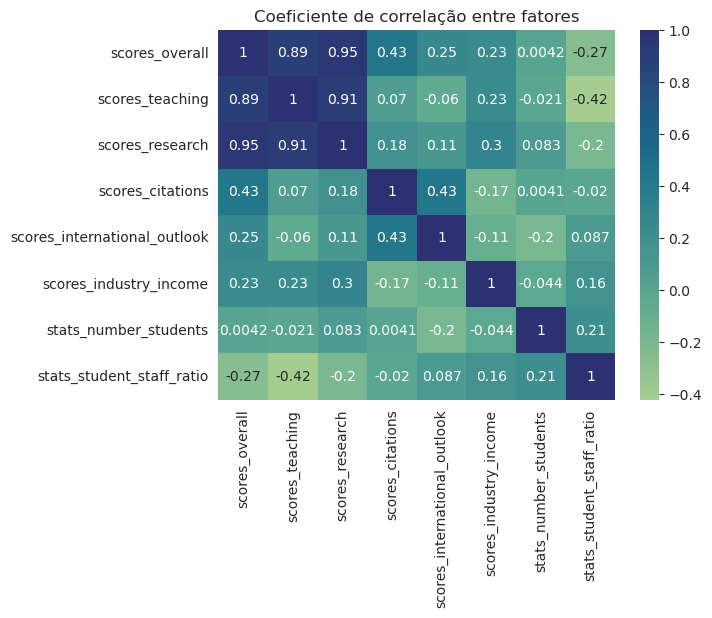

In [190]:
#plotar correlação entre os seis fatores considerados usando seaborn
import matplotlib.pyplot as plt
plt.title('Coeficiente de correlação entre fatores')
sns.heatmap(dados_2024.loc[:199,fatores_analisados].corr(), annot=True,cmap="crest")


In [191]:
##plotar correlação entre os seis fatores considerados usando plotly
fig = px.imshow(dados_2024.loc[:199,fatores_analisados].corr(),text_auto=True,color_continuous_scale='RdBu_r')
fig.show()

### Construção de rankings baseados em outros fatores

Verificar quais universidades se destacam em cada ponto considerado para a criação dos rankings.
Função para criação de rankings baseados nos seguintes indicadores:
 
 - teaching;
 - research;
 - citations;
 - international_outlook;
 - industry_income.

In [192]:
def ranking_fator_selecinado(dados,ano,fator,n_posicoes,overall_ranking='rank',name_universities='name',location='location'):
    '''
    Função para gerar uma ranking para o fator desejado

    Inputs:
        dados             - Pandas dataframe com os rankings de cada ano
        ano               - (str) ano selecionado para o qual o ranking será criado
        fator             - (str) nome do fator considerado para contrucao do ranking. Fatores aceitos são: 'scores_teaching_rank',
                                  'scores_international_outlook_rank','scores_industry_income_rank','scores_research_rank','scores_citations_rank'
        n_posicoes        - (int) número de posições no ranking gerado. Serão incluídas desde a posição 1 até n_posicões
        overall_ranking   - (str) nome da coluna do dataframe dados que contem a posição das universidades no ranking geral
        name_universities - (str) nome da coluna do dataframe dados que contem o nome das universidade
        location          - (str) nome da coluna no dataframe com os paises de origem das universidades

    
    '''
    if fator not in ['scores_teaching_rank','scores_international_outlook_rank','scores_industry_income_rank',
                    'scores_research_rank','scores_citations_rank']:
        raise Exception('Fator selecionador deve ser um dos seguintes: scores_international_outlook_rank,scores_teaching_rank,scores_international_outlook_rank,scores_industry_income_rank,scores_research_rank,scores_citations_rank')

    dados=dados.loc[ano,:] #selecionar o ano
    #print(dados)
    dados_ordenados=dados.sort_values(by=fator).reset_index(drop=True) #ordenar os valores de acordo com o fator selecionado
    dados_ordenados=dados_ordenados.loc[:(n_posicoes-1),[overall_ranking,name_universities,location]] 
    dados_ordenados.rename(columns={overall_ranking:'Ranking Geral',location:'Location',name_universities:'Top '+str(n_posicoes)+' '+fator.split('_')[1]},inplace=True)
    dados_ordenados.index=np.arange(1,n_posicoes+1) #index começando em zero
    return dados_ordenados

In [193]:
#Exemplo: 20 melhores universidades de acordo com o critério pesquisa e suas posições no ranking geral
ano_selecionado='2024'
ranking_2024_research=ranking_fator_selecinado(df_dados,ano_selecionado,'scores_research_rank',20)
ranking_2024_research

,Ranking Geral,Top 20 research,Location
1,5,University of Cambridge,United Kingdom
2,1,University of Oxford,United Kingdom
3,4,Harvard University,United States
4,9,"University of California, Berkeley",United States
5,12,Tsinghua University,China
6,7,California Institute of Technology,United States
7,6,Princeton University,United States
8,2,Stanford University,United States
9,14,Peking University,China
10,11,ETH Zurich,Switzerland


Função para criação de um dataframe com universidades em cada coluna rankeadas de acordo com os seguintes fatores:

 - geral
 - teaching;
 - research;
 - citations;
 - international_outlook;
 - industry_income.

In [194]:
def ranking_seis_fatores(dados,ano,n_posicoes,coluna_names='name'):
    """
    Função para crição de um dataframe em quem em cada cada uma delas as universidade aparecem rankeadas de acordo com um dos 6 fatores:
        -Geral;
        -Teaching;
        -Research;
        -International outlook;
        -Industry income

    Inputs:
        dados        - Pandas dataframe com os rankings para todos os anos
        ano          - (str) Ranking relativos ao ano especificado
        n_posicoes   - (int) Número de posições que aparecerão no ranking
        coluna_names - (str) Nome da coluna com o nome das universidades

    Outpout:
        Pandas dataframe com 6 colunas,são elas:
            Ranking Geral: Universidade rankeadas de acordo com a média de todos os fatores (calculados pelo THE)
            Ranking Teaching: Universidades rankeadas de acordo com o score obtido para ensino
            Ranking Research: Universidade rankeadas de acordo com o score obtido para pesquisa
            Ranking International outlook: Universidade rankeadas de acordo com o score obtido para internacionalização
            Ranking Industry Income: Universidade rankeadas de acordo com o score obtido relação com indústria
    """
    #nome das colunas do dataframe original que serão usadas para criação dos rankings
    fatores=['scores_teaching_rank','scores_research_rank','scores_citations_rank','scores_international_outlook_rank','scores_industry_income_rank']

    name=['Geral','Teaching','Reasearch','Citations','International Outlook',"Industry Income"] #nome dos fatores como aparecerão no dataframe
    dados_ano_selecionado=dados.loc[ano,:] #seleção dos dados para o ano especificado
    ranking_fatores=dados_ano_selecionado.loc[:n_posicoes-1,['name']] #universidades ordenadas de acordo com overall ranking
    ranking_fatores.rename(columns={coluna_names: 'Ranking '+name[0]},inplace=True) #renomear coluna
    for num,factor in enumerate(fatores):
        dados_fator=dados_ano_selecionado.sort_values(by=factor).reset_index(drop=True)
        dados_fator=dados_fator.loc[:n_posicoes-1,['name']]
        dados_fator.rename(columns={coluna_names:'Ranking '+name[num+1]},inplace=True)
        ranking_fatores=pd.concat([ranking_fatores,dados_fator],axis=1)
    ranking_fatores.index=np.arange(1,n_posicoes+1)
    return ranking_fatores

In [195]:
#Exemplo: Top 20 para o ano de 2024
ano_selecionado='2024'
top_20_2024=ranking_seis_fatores(df_dados,ano_selecionado,20)
top_20_2024

,Ranking Geral,Ranking Teaching,Ranking Reasearch,Ranking Citations,Ranking International Outlook,Ranking Industry Income
1,University of Oxford,Stanford University,University of Cambridge,Massachusetts Institute of Technology,University of Sharjah,"University of California, San Diego"
2,Stanford University,Massachusetts Institute of Technology,University of Oxford,Stanford University,City University of Hong Kong,California Institute of Technology
3,Massachusetts Institute of Technology,Harvard University,Harvard University,Harvard University,Università della Svizzera italiana,Charité - Universitätsmedizin Berlin
4,Harvard University,California Institute of Technology,"University of California, Berkeley","University of California, Berkeley",Brunel University London,City University of Hong Kong
5,University of Cambridge,University of Oxford,Tsinghua University,University of Oxford,Queen’s University Belfast,Delft University of Technology
6,Princeton University,Princeton University,California Institute of Technology,Carnegie Mellon University,Imperial College London,Duke University
7,California Institute of Technology,University of Cambridge,Princeton University,Princeton University,Queen Mary University of London,Eindhoven University of Technology
8,Imperial College London,Peking University,Stanford University,Imperial College London,UCL,University of Erlangen-Nuremberg
9,"University of California, Berkeley",Tsinghua University,Peking University,UCL,Abu Dhabi University,University of Freiburg
10,Yale University,Yale University,ETH Zurich,Vita-Salute San Raffaele University,Hong Kong Baptist University,The Hong Kong University of Science and Techno...


### Male & Female proportion 

- Os dados sobre a proporção entre estudantes homens e mulheres só foram incluidos a partir do ranking de 2016.


In [196]:
#Função para plotar a distribuição da proporção de homens ou mulheres nas universidades que entraram no ranking das melhores no ano selecionado
#serão gerados dois gráficos, um histograma e um boxplot
def grafico_male_female(dados,ano,tipo):
    '''
    Função para plotar um histograma e um boxplot com a proporção de homens ou mulheres nas universidaderes que entraram no ranking no ano selecionado

    Inputs:
        dados: (Pandas dataframe) conjunto de dados com os rankings para todos os anos
        ano:   (str) ano do ranking. Os dados estão disponíveis para os rankings a partir de 2016
        tipo:  (str) male or female. Define se será plotada a proporção de homens ou mulheres
    Outputs: Histograma e boxplot com a proporção de homens ou mulheres nas universidades que entraram no ranking do ano selecionado 
    '''
    if ano not in ['2016','2017','2018','2019','2020','2021','2022','2023','2024']: #anos para os quais os dados estão disponíveid
        raise Exception(print('Os dados não estão disponíveis para o ano de {}'.format(ano)))
    coluna=tipo+' proportion' #nome da coluna
    sns.set_style("darkgrid") #estilo do gráfico
    num_universidades=dados.loc[ano,[coluna]].notna().sum().item() # número de universidades com dados disponíveis
    fig,axs=plt.subplots(nrows=2,ncols=1,figsize=(16,9))
    sns.histplot(data=dados.loc[ano,:],x=coluna,stat='frequency',ax=axs[0]) 
    sns.boxplot(data=df_dados.loc[ano,:],x=coluna,ax=axs[1])
    
    #Adicionar texto no gráfico com o ano do ranking e o número de universidades para as quais os dados estavam dispoiníveis
    props = dict(boxstyle='round', facecolor='gray', alpha=0.5)  #adiconar caixa de texto na cor selecionada
    axs[0].text(0.01, 0.99, 'Ano: {} \nNúmero de Universidades: {}'.format(ano,num_universidades), transform=axs[0].transAxes, fontsize=14,
    verticalalignment='top',horizontalalignment='left', bbox=props) #Adicionar o texto. As posições variam de 0 a 1.
    
    

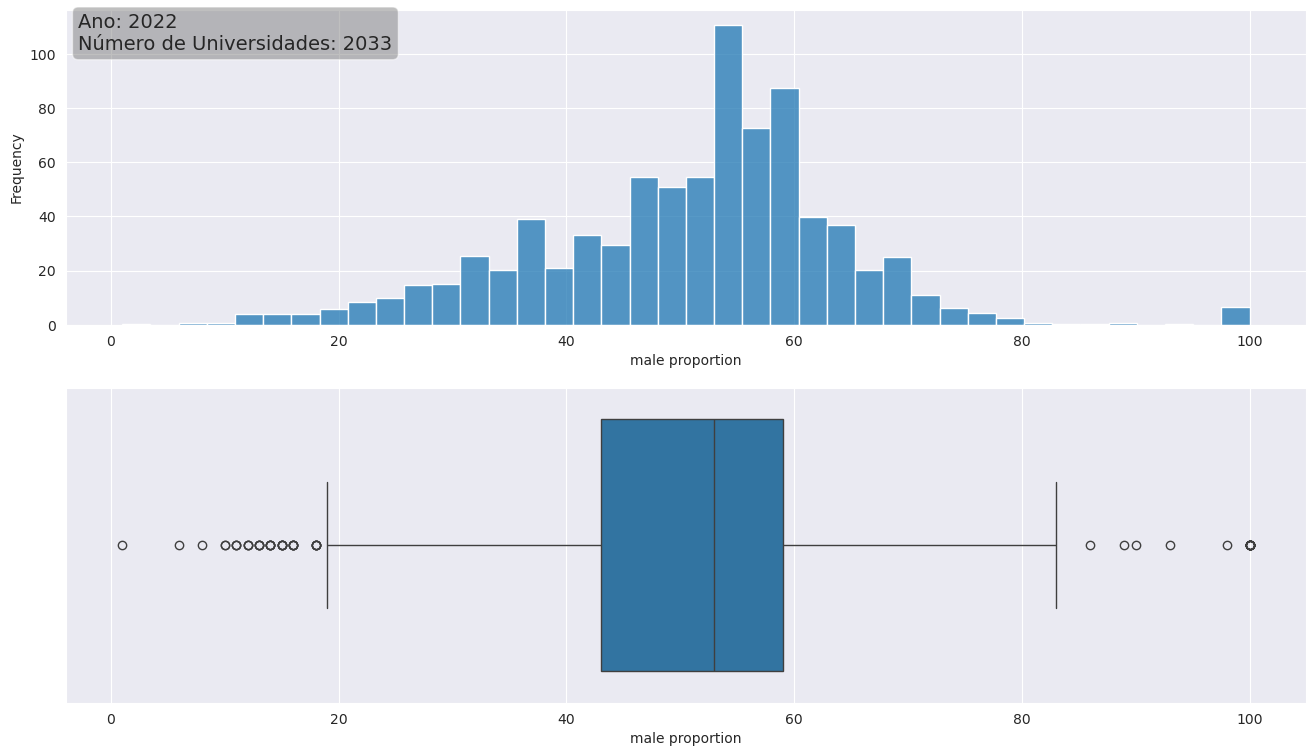

In [197]:
#Plotar a porporção de homens nas universidades para um ano selecionado
grafico_male_female(df_dados,'2022','male')

In [198]:
#Mediana da proporção de homens nas universidade que compõe cada ranking

df_ranking_completo_male_prop={'Ano':[],'Mediana da Proporção de Homens (%)':[], "Número de universidades": []}
for ano in anos: #anos é uma lista com os anos para os quais o rankings estão disponíveis
    median_male_prop=df_dados.loc[ano,['male proportion']].median().item() #calculo da mediana
    num_total=df_dados.loc[ano,['male proportion']].notna().sum().item()   #número total de universidades, excluindo nan
    if num_total==0: #dados referentes ao male proportion.Para alguns anos esses dados não estão disponpíveis. 
        num_total='Dados indisponíveis'
        median_male_prop='Dados indisponíveis'
    df_ranking_completo_male_prop['Ano']+=[ano]
    df_ranking_completo_male_prop['Mediana da Proporção de Homens (%)']+=[median_male_prop]
    df_ranking_completo_male_prop["Número de universidades"]+=[num_total]
df_ranking_completo_male_prop=pd.DataFrame.from_dict(df_ranking_completo_male_prop)
df_ranking_completo_male_prop

,Ano,Mediana da Proporção de Homens (%),Número de universidades
0,2011,Dados indisponíveis,Dados indisponíveis
1,2012,Dados indisponíveis,Dados indisponíveis
2,2013,Dados indisponíveis,Dados indisponíveis
3,2014,Dados indisponíveis,Dados indisponíveis
4,2015,Dados indisponíveis,Dados indisponíveis
5,2016,52.0,748
6,2017,52.0,926
7,2018,52.0,1047
8,2019,52.0,1202
9,2020,52.0,1331


Interpretação:

- Para o ano de 2024 os dados a respeito da proporção de alunos homens e mulheres foram fornecidos por 2578 universidades. Dentre elas, em 1288 a propoção de alunos homens era inferior a 53% enquanto nas restantes era superior. A proporção de 53% é a mediana para o ano de 2024. Essa mediana cresceu de 52 para 53% no intervalo entre 2016 e 2024.



In [199]:
#Mediana da proporção de homens nas universidade que compõe o top 10 de cada ranking

df_ranking_top10_male_prop={'Ano':[],'Mediana da Proporção de Homens (%)':[], "Número de universidades": []}
for ano in anos: #anos é uma lista com os anos para os quais os rankings estão disponíveis
    median_male_prop=df_dados.loc[(ano,slice(0,9)),['male proportion']].median().item() #calculo da mediana para as universidade no top 10
    num_total=df_dados.loc[(ano,slice(0,9)),['male proportion']].notna().sum().item()   #número de universidades, excluindo nan
    if num_total==0: #dados referentes ao male proportion. Dados referentes a proporção entre alunos homens e mulheres só estão disponíveis a partir do ranking de 2016
        num_total='Dados indisponíveis'
        median_male_prop='Dados indisponíveis'
    df_ranking_top10_male_prop['Ano']+=[ano]
    df_ranking_top10_male_prop['Mediana da Proporção de Homens (%)']+=[median_male_prop]
    df_ranking_top10_male_prop["Número de universidades"]+=[num_total]
df_ranking_top10_male_prop=pd.DataFrame.from_dict(df_ranking_top10_male_prop)
df_ranking_top10_male_prop


,Ano,Mediana da Proporção de Homens (%),Número de universidades
0,2011,Dados indisponíveis,Dados indisponíveis
1,2012,Dados indisponíveis,Dados indisponíveis
2,2013,Dados indisponíveis,Dados indisponíveis
3,2014,Dados indisponíveis,Dados indisponíveis
4,2015,Dados indisponíveis,Dados indisponíveis
5,2016,42.0,9
6,2017,42.0,9
7,2018,42.0,9
8,2019,44.5,10
9,2020,45.5,10


Interpretação:

- Entre as universidades no top 10, a maior parte
delas tem maior proporção de alunos do sexo feminino.

In [200]:
#comparativos da mediana das proporções de homens para universidades no top 10 e no top 100
df_comparativo_male_prop={'Ano':[],'Mediana da Proporção de Homens (Top 10))':[], 'Mediana da Proporção de Homens (Top 100))':[]}
for ano in anos:
    median_top10=df_dados.loc[(ano,slice(0,9)),['male proportion']].median().item() #calculo da mediana para as universidade no top 10
    median_top100=df_dados.loc[(ano,slice(0,99)),['male proportion']].median().item() #calculo da mediana para as universidade no top 100
    num_total=df_dados.loc[(ano,slice(0,9)),['male proportion']].notna().sum().item()   #número de universidades, excluindo nan
    if num_total==0: #dados referentes ao male proportion 
        median_top100='Dados indisponíveis'
        median_top10='Dados indisponíveis'
    df_comparativo_male_prop['Ano']+=[ano]
    df_comparativo_male_prop['Mediana da Proporção de Homens (Top 10))']+=[median_top10]
    df_comparativo_male_prop['Mediana da Proporção de Homens (Top 100))']+=[median_top100]
df_comparativo_male_prop=pd.DataFrame.from_dict(df_comparativo_male_prop)
df_comparativo_male_prop


,Ano,Mediana da Proporção de Homens (Top 10)),Mediana da Proporção de Homens (Top 100))
0,2011,Dados indisponíveis,Dados indisponíveis
1,2012,Dados indisponíveis,Dados indisponíveis
2,2013,Dados indisponíveis,Dados indisponíveis
3,2014,Dados indisponíveis,Dados indisponíveis
4,2015,Dados indisponíveis,Dados indisponíveis
5,2016,42.0,52.0
6,2017,42.0,51.0
7,2018,42.0,52.0
8,2019,44.5,52.0
9,2020,45.5,52.0


Interpretação:

- A maior parte das universidades que compõe o top 100 ao longo dos anos tem maior propoção de alunos do sexo masculino. Porém quando são consideradas somente universidades no top 10, a situação se inverte. 

### Number of Students


Comentários para o ranking de 2024:

- As 20 maiores universidades em número de alunos estão em países de 3° mundo;
- A Colômbia tem a maior universidade sul americana;
- Os Estados Unidos tem 175 universidades no ranking de 2024, mas nenhuma dentre as 20 com maior número de alunos. A maior universidade americana tem 66389 alunos, oucupando a posição 59;
- China e India, os dois países com as maiores populações do planeta, não tem nenhuma universidade no top 20 em número de alunos. A maior universidade chinesa tem 74052 alunos e está na posição 45, enquanto a maior indiana tem 49683 e está na posição 118;
- A maior universidade brasileira é a USP,com 82463 alunos oucupando a trigésima segunda posição.


In [201]:
#Top 20 das universidades com maior número de alunos dentre as que entraram no ranking de 2024
ano='2024'
#dataframe com as universidades ordenadas de acordo com o número de alunos
dados_2024_alunos=df_dados.loc[ano,['rank','name','location','stats_number_students']].sort_values(by='stats_number_students',ascending=False)
dados_2024_alunos.index=np.arange(1,len(dados_2024_alunos)+1) #index representando a classificação da universidade de acordo com o número de alunos
dados_2024_alunos.head(20)

,rank,name,location,stats_number_students
1,1201–1500,Tribhuvan University,Nepal,482541.0
2,1501+,Payame Noor University,Iran,428888.0
3,801–1000,Al-Azhar University,Egypt,269733.0
4,Reporter,Universidad Nacional Abierta y a Distancia (UNAD),Colombia,226124.0
5,801–1000,University of Dhaka,Bangladesh,216258.0
6,801–1000,Alexandria University,Egypt,205777.0
7,801–1000,Cairo University,Egypt,202915.0
8,1001–1200,University of South Africa,South Africa,198816.0
9,801–1000,National Autonomous University of Mexico,Mexico,175561.0
10,1501+,National University of Córdoba,Argentina,174780.0


In [202]:
#Maiores universidades brasileiras
dados_2024_alunos[dados_2024_alunos['location']=='Brazil']

,rank,name,location,stats_number_students
33,201–250,University of São Paulo,Brazil,83182.0
34,1501+,Universidade Nove de Julho (Uninove),Brazil,82463.0
51,1501+,Fluminense Federal University,Brazil,70629.0
103,601–800,Federal University of Rio de Janeiro,Brazil,52534.0
110,1201–1500,Universidade Federal da Bahia,Brazil,51291.0
...,...,...,...,...
2087,Reporter,Universidade Estadual do Norte do Paraná (UENP),Brazil,5443.0
2137,Reporter,Unichristus,Brazil,5055.0
2153,Reporter,Vila Velha University,Brazil,4915.0
2249,1501+,Universidade Federal de Ciências da Saúde de P...,Brazil,4183.0


In [203]:
#maiores universidades americanas, chinesas e indianas
dados_2024_alunos[(dados_2024_alunos['location']=='United States')|(dados_2024_alunos['location']=='China')|(dados_2024_alunos['location']=='India')]

,rank,name,location,stats_number_students
45,601–800,Zhengzhou University,China,74052.0
59,198,Indiana University,United States,66389.0
60,401–500,University of Central Florida,United States,65269.0
61,118,Texas A&M University,United States,64427.0
65,=123,University of Massachusetts,United States,63500.0
...,...,...,...,...
2566,Reporter,"Amity University, Gwalior",India,1170.0
2593,Reporter,Northeast Ohio Medical University,United States,989.0
2596,Reporter,Management Development Institute (MDI),India,966.0
2619,Reporter,Tata Institute of Fundamental Research,India,758.0


In [204]:
#Número de alunos nas universidades melhores colocadas
df_dados.loc[ano,['rank','name','location','stats_number_students']].head(10)

,rank,name,location,stats_number_students
0,1,University of Oxford,United Kingdom,21750.0
1,2,Stanford University,United States,14517.0
2,3,Massachusetts Institute of Technology,United States,11085.0
3,4,Harvard University,United States,20050.0
4,5,University of Cambridge,United Kingdom,20565.0
5,6,Princeton University,United States,7753.0
6,7,California Institute of Technology,United States,2240.0
7,8,Imperial College London,United Kingdom,20275.0
8,9,"University of California, Berkeley",United States,39991.0
9,10,Yale University,United States,11924.0


### Student Staff Ratio

Comentários para o ranking de 2024:

- Dentre as 20 universidade com menores proporções entre alunos e funcionários, 9 delas estão no Japão;
- 7 universidades tem mais funcionários que alunos;
- As universidades com menores propoções entre alunos e funcionários são da área de saúde.

In [205]:
#Ranking das universidades com as maiores proporções de funcionários em relação ao número de alunos

ano='2024'
df_dados.loc[ano,['rank','name','location','stats_student_staff_ratio']].sort_values(by='stats_student_staff_ratio').head(20)

,rank,name,location,stats_student_staff_ratio
518,501–600,Brighton and Sussex Medical School,United Kingdom,0.3
2305,Reporter,Kutaisi University,Georgia,0.4
2182,Reporter,"The Graduate University for Advanced Studies, ...",Japan,0.5
1442,1201–1500,St Marianna University School of Medicine,Japan,0.8
1320,1201–1500,The Jikei University School of Medicine,Japan,0.9
1131,1001–1200,Nippon Medical School,Japan,0.9
328,301–350,Oregon Health and Science University,United States,0.9
1913,Reporter,Ada Kent University,Northern Cyprus,1.0
1598,1501+,Dokkyo Medical University,Japan,1.2
1408,1201–1500,Saitama Medical University,Japan,1.4


## Universidades Brasileiras

In [206]:
df_universidades_brasileiras=df_dados[df_dados['location']=="Brazil"] #dataframe somente com as universidades brasileiras
df_universidades_brasileiras

rank_order      rank                          name scores_overall  \
2012 177          178       178       University of São Paulo           44.1   
     292          276   276-300        University of Campinas              -   
2013 159          158       158       University of São Paulo           50.5   
     267          251   251-275        University of Campinas              -   
2014 244          226   226-250       University of São Paulo              -   
...               ...       ...                           ...            ...   
2024 2469     1000565  Reporter                  PUC-Campinas            NaN   
     2620     1000716  Reporter                         UNESC            NaN   
     2621     1000717  Reporter                   Unichristus            NaN   
     2633     1000729  Reporter  University of Vale do Itajaí            NaN   
     2639     1000735  Reporter         Vila Velha University            NaN   

           scores_overall_rank  scores_teaching  scores_teaching_rank  \
2012 177                 179.0             61.7                  52.0   
     292                 294.0             52.3                  78.0   
2013 159                 160.0             63.0                  58.0   
     267                 292.0             51.7                  94.0   
2014 244                 360.0             47.2                  83.0   
...                        ...              ...                   ...   
2024 2469                  NaN              NaN                   NaN   
     2620                  NaN              NaN                   NaN   
     2621                  NaN              NaN                   NaN   
     2633                  NaN              NaN                   NaN   
     2639                  NaN              NaN                   NaN   

          scores_international_outlook  scores_international_outlook_rank  \
2012 177                          22.9                              361.0   
     292                          19.1                              380.0   
2013 159                          24.5                              372.0   
     267                          20.9                              385.0   
2014 244                          24.9                              377.0   
...                                ...                                ...   
2024 2469                          NaN                                NaN   
     2620                          NaN                                NaN   
     2621                          NaN                                NaN   
     2633                          NaN                                NaN   
     2639                          NaN                                NaN   

          scores_industry_income  ...  \
2012 177                    33.3  ...   
     292                    43.2  ...   
2013 159                    40.0  ...   
     267                    44.9  ...   
2014 244                    40.1  ...   
...                          ...  ...   
2024 2469                    NaN  ...   
     2620                    NaN  ...   
     2621                    NaN  ...   
     2633                    NaN  ...   
     2639                    NaN  ...   

                                            subjects_offered  closed  \
2012 177   Electrical & Electronic Engineering,Politics &...   False   
     292   Architecture,Mechanical & Aerospace Engineerin...   False   
2013 159   Electrical & Electronic Engineering,Politics &...   False   
     267   Architecture,Mechanical & Aerospace Engineerin...   False   
2014 244   Electrical & Electronic Engineering,Politics &...   False   
...                                                      ...     ...   
2024 2469  Other Health,Sociology,Mechanical & Aerospace ...   False   
     2620  General Engineering,Economics & Econometrics,C...   False   
     2621  Computer Science,General Engineering,Other Hea...   False   
     2633  Art, Performing Arts & D

In [207]:
#Criação de dataframe com as 10 universidade brasileiras melhores colocadasno ranking de 2024
#Dataframe será usado no readme do projeto
'''
x=df_universidades_brasileiras.loc['2024',['rank','name']]
x.rename(columns={'rank':'Posição no Ranking','name':'Universidade'},inplace=True)
x=x.iloc[:10,:]
x=x.style.format().hide(axis='index')
path='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/education_analysis/Times Higher Education/images/'
dfi.export(x,path+'top_brasileiras')
'''

"\nx=df_universidades_brasileiras.loc['2024',['rank','name']]\nx.rename(columns={'rank':'Posição no Ranking','name':'Universidade'},inplace=True)\nx=x.iloc[:10,:]\nx=x.style.format().hide(axis='index')\npath='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/education_analysis/Times Higher Education/images/'\ndfi.export(x,path+'top_brasileiras')\n"

### Número de universidades brasileiras nos rankings de cada ano

In [208]:
#Número de universidades brasileiras que entraram no ranking
#Dataframe com o número total de universidades no ranking de cada ano e quantas dessas são brasileiras
num_brasileiras={'Ano':[],
                'Total Universidades':[],
                'Universidades Brasileiras':[]}
for ano in anos:
    num_brasileiras['Ano']+=[ano]
    num_brasileiras['Total Universidades']+=[len(df_dados.loc[ano])]
    try:
        num_brasileiras['Universidades Brasileiras']+=[len(df_universidades_brasileiras.loc[ano])] #testar se alguma universidade brasileira está presente no ranking
    except:
        num_brasileiras['Universidades Brasileiras']+=[0]

num_brasileiras=pd.DataFrame.from_dict(num_brasileiras)
num_brasileiras

                

,Ano,Total Universidades,Universidades Brasileiras
0,2011,200,0
1,2012,402,2
2,2013,400,2
3,2014,400,2
4,2015,401,2
5,2016,800,17
6,2017,981,27
7,2018,1103,32
8,2019,1258,36
9,2020,1397,46


### Universidades brasileiras melhores colocadas

- Nenhuma universidade brasileira ficou entre as 100 melhores colocadas nos ranking entre os anos de 2011 e 2024;
- No anos de 2012 e 2013 a USP ficou entre as 200 melhores colocadas;
- Nos demais anos  a USP ficou entre as 300 melhores;
- A Unicamp entrou no ranking entre as 300 melhores nos anos de 2012 e 2013.
- A USP e a Unicamp são as universidade brasileiras melhores colocadas em todos os rankings.

In [209]:
#universidades brasileiras entre as 100 melhores
df_universidades_brasileiras.loc[pd.IndexSlice[:,:100],:]

,,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,subjects_offered,closed,unaccredited,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,male proportion,female proportion


In [210]:
#Universidades brasileiras entre as 200 melhores
df_universidades_brasileiras.loc[pd.IndexSlice[:,:200],:]

,,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,subjects_offered,closed,unaccredited,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,male proportion,female proportion
2012,177,178,178,University of São Paulo,44.1,179.0,61.7,52.0,22.9,361.0,33.3,...,"Electrical & Electronic Engineering,Politics &...",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,159,158,158,University of São Paulo,50.5,160.0,63.0,58.0,24.5,372.0,40.0,...,"Electrical & Electronic Engineering,Politics &...",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [211]:
#Universidades brasileiras entre as 300 melhores
df_universidades_brasileiras.loc[pd.IndexSlice[:,:300],:]

rank_order     rank                     name scores_overall  \
2012 177         178      178  University of São Paulo           44.1   
     292         276  276-300   University of Campinas              -   
2013 159         158      158  University of São Paulo           50.5   
     267         251  251-275   University of Campinas              -   
2014 244         226  226-250  University of São Paulo              -   
2015 221         201  201-225  University of São Paulo              -   
2016 209         210  201-250  University of São Paulo            0.0   
2017 290        2910  251-300  University of São Paulo      43.5—46.2   
2018 284        2850  251–300  University of São Paulo      45.2–48.2   
2019 280        2810  251–300  University of São Paulo      46.4–49.4   
2020 285        2860  251–300  University of São Paulo      46.9–50.0   
2021 236        2370  201–250  University of São Paulo      50.6–54.2   
2022 235        2360  201–250  University of São Paulo      50.4–53.9   
2023 232        2330  201–250  University of São Paulo      51.2–54.3   
2024 236        2370  201–250  University of São Paulo      55.9–58.6   

          scores_overall_rank  scores_teaching  scores_teaching_rank  \
2012 177                179.0             61.7                  52.0   
     292                294.0             52.3                  78.0   
2013 159                160.0             63.0                  58.0   
     267                292.0             51.7                  94.0   
2014 244                360.0             47.2                  83.0   
2015 221                358.0             51.6                  68.0   
2016 209                210.0             60.9                  49.0   
2017 290               2910.0             57.2                  63.0   
2018 284               2850.0             52.9                  79.0   
2019 280               2810.0             55.9                  81.0   
2020 285               2860.0             56.4                  77.0   
2021 236               2370.0             56.6                  74.0   
2022 235               2360.0             55.8                  77.0   
2023 232               2330.0             54.5                  89.0   
2024 236               2370.0             59.8                  75.0   

         scores_international_outlook  scores_international_outlook_rank  \
2012 177                         22.9                              361.0   
     292                         19.1                              380.0   
2013 159                         24.5                              372.0   
     267                         20.9                              385.0   
2014 244                         24.9                              377.0   
2015 221                         25.3                              385.0   
2016 209                         25.3                              647.0   
2017 290                         28.3                              715.0   
2018 284                         30.9                              754.0   
2019 280                         32.7                              838.0   
2020 285                         33.9                              908.0   
2021 236                         35.2                              944.0   
2022 235                         35.9                             1001.0   
2023 232                         37.2                             1038.0   
2024 236                         42.5                             1033.0   

         scores_industry_income  ...  \
2012 177                   33.3  ...   
     292                   43.2  ...   
2013 159                   40.0  ...   
     267                   44.9  ...   
2014 244                   40.1  ...   
2015 221                   40.1  ...   
2016 209                   40.3  ...   
2017 290                   39.6  ...   
2018 284                   38.1  ...   
2019 280                   39.5  ...   
2020 285                   39.9

In [212]:
#Criação de dataframe com as 3 universidades brasileiras melhores colocadas em cada ranking

top_3_brasileiras={}
rankings_com_brasileiras=set(df_universidades_brasileiras.index.get_level_values(0).to_list())
for ano in rankings_com_brasileiras:
    top_3_brasileiras[ano]=df_universidades_brasileiras.loc[ano,'name'].iloc[:3].reset_index(drop=True)
top_3_brasileiras=pd.DataFrame.from_dict(top_3_brasileiras)
top_3_brasileiras

,2012,2022,2018,2016,2020,2024,2015,2023,2021,2014,2017,2013,2019
0,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo
1,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas
2,NaN,Federal University of Minas Gerais,Universidade Federal de São Paulo (UNIFESP),Federal University of Rio de Janeiro,Federal University of Minas Gerais,Universidade Estadual Paulista (Unesp),NaN,Universidade Federal do Rio Grande do Sul,Federal University of Minas Gerais,NaN,Universidade Federal do ABC (UFABC),NaN,Federal University of Minas Gerais


In [213]:
#Correção da ordem das colunas no dataframe top_3_brasileiras 
#Ordenar as colunas em rodem crescente 

rankings_com_brasileiras=list(rankings_com_brasileiras) #em rankings_com_brasileiras estão os anos dos rankings
rankings_com_brasileiras=[int(i) for i in rankings_com_brasileiras] #conversão para inteiro para permitir a ordenação
rankings_com_brasileiras.sort()
rankings_com_brasileiras=[str(i) for i in rankings_com_brasileiras] #dados ordenados convertidos de volta para string
top_3_brasileiras=top_3_brasileiras[rankings_com_brasileiras]
top_3_brasileiras.index=[1,2,3]
top_3_brasileiras.fillna(value='None',inplace=True) #substituição de nan por None, que significa que o número de universidades que entraram no ranking é menor que 3
top_3_brasileiras

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo,University of São Paulo
2,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas,University of Campinas
3,None,None,None,None,Federal University of Rio de Janeiro,Universidade Federal do ABC (UFABC),Universidade Federal de São Paulo (UNIFESP),Federal University of Minas Gerais,Federal University of Minas Gerais,Federal University of Minas Gerais,Federal University of Minas Gerais,Universidade Federal do Rio Grande do Sul,Universidade Estadual Paulista (Unesp)


### Posição das universidade brasileiras considerando cada indicador

- Essa análise será feita somente para o último ranking disponível

- Dentre as universidades brasileiras, a USP aparece melhor colocada nos rankings baseados no ensino, pesquisa, impacto comercial e impacto acadêmico das publicações produzidas.
- A Usp aparece nas seguintes posições no ranking de 2024 :

    - ensino: 75°
    - pesquisa: 82°
    - impacto da pesquisa: 842°
    - intercâmbio com a indústria: 477°

In [214]:
#Universidades brasileiras rankeadas de acordo com o ensino
dados_2024.loc[dados_2024['location']=='Brazil',['name','scores_teaching_rank']]

,name,scores_teaching_rank
236,University of São Paulo,75.0
357,University of Campinas,133.0
651,Universidade Estadual Paulista (Unesp),269.0
653,Federal University of Rio de Janeiro,264.0
654,Universidade Federal do Rio Grande do Sul,415.0
...,...,...
2469,PUC-Campinas,NaN
2620,UNESC,NaN
2621,Unichristus,NaN
2633,University of Vale do Itajaí,NaN


In [215]:
#Universidades brasileiras rankeadas de acordo com a pesquisa
dados_2024.loc[dados_2024['location']=='Brazil',['name','scores_research_rank']]

,name,scores_research_rank
236,University of São Paulo,82.0
357,University of Campinas,185.0
651,Universidade Estadual Paulista (Unesp),400.0
653,Federal University of Rio de Janeiro,325.0
654,Universidade Federal do Rio Grande do Sul,708.0
...,...,...
2469,PUC-Campinas,NaN
2620,UNESC,NaN
2621,Unichristus,NaN
2633,University of Vale do Itajaí,NaN


In [216]:
#Universidades brasileiras rankeadas de acordo com o impacto acadêmico da pesquisa (medido pelo número de citações)
dados_2024.loc[dados_2024['location']=='Brazil',['name','scores_citations_rank']]

,name,scores_citations_rank
236,University of São Paulo,842.0
357,University of Campinas,915.0
651,Universidade Estadual Paulista (Unesp),1258.0
653,Federal University of Rio de Janeiro,1285.0
654,Universidade Federal do Rio Grande do Sul,914.0
...,...,...
2469,PUC-Campinas,NaN
2620,UNESC,NaN
2621,Unichristus,NaN
2633,University of Vale do Itajaí,NaN


In [217]:
#Universidades brasileiras rankeadas de acordo com o impacto comercial da pesquisa produzida
dados_2024.loc[dados_2024['location']=='Brazil',['name','scores_industry_income_rank']]

,name,scores_industry_income_rank
236,University of São Paulo,477.0
357,University of Campinas,537.0
651,Universidade Estadual Paulista (Unesp),971.0
653,Federal University of Rio de Janeiro,251.0
654,Universidade Federal do Rio Grande do Sul,754.0
...,...,...
2469,PUC-Campinas,NaN
2620,UNESC,NaN
2621,Unichristus,NaN
2633,University of Vale do Itajaí,NaN


### USP e Unicamp

#### Comparativo com as 10 melhores colocadas

Comparativo da USP e da Unicamp com as 10 primeiras colocadas considerando os resultados do ranking de 2024


- Análise do ranking para 2024;
- USP e Unicamp são as duas universidade brasileiras melhores colocadas em todos os rankings;
- Será criado um dataframe contendo as 10 melhores colocadas no ranking 2024 e as duas universidade brasileiras melhores colocadas;
- A universidades brasileiras ficam muito atrás das 10 melhores em todos os quesitos mais importantes (pesquisa, ensino, impacto comercial e acadêmico da pesquisa);
- O score em que USP e Unicamp se saem melhor é o impacto comercial da pesquisa produzida (scores_industry_income), em que obtiveram 68,20 e 65,5 respectivamente.


In [218]:
#dados da USP e da Unicamp para certos fatores que serão usados no comparativo
#dados de universidades no top 10 para certos fatores que serão usados no comparativo

colunas_comparativo=['name','location','rank','scores_teaching','scores_research','scores_citations','scores_industry_income','scores_international_outlook','stats_number_students','stats_student_staff_ratio']
#colunas_comparativo são as colunas que serão usadas no comparativo
ranking_2024=df_dados.loc['2024',colunas_comparativo] #somente o ranking de 2024
ranking_2024['scores_industry_income']=ranking_2024['scores_industry_income'].astype('float64',errors='ignore',copy=True)# converter formato dos dados
ranking_2024['scores_international_outlook']=ranking_2024['scores_international_outlook'].astype('float64',errors='ignore',copy=True)# converter formato dos dados
filtro=((ranking_2024['name']=='University of São Paulo') | (ranking_2024['name']=='University of Campinas')) #filtro para selecionar somente USP e Unicamp
usp_unicamp=ranking_2024.loc[filtro,:] #dados para usp e unicamp
top10_2024=ranking_2024.loc[:9,:] #10 primeiras colocadas no ranking de 2024



In [219]:
#Universidades no top 10 no ano de 2024
top10_2024.index=np.arange(1,11) #correcao do index para iniciar com  1
top10_2024

,name,location,rank,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
1,University of Oxford,United Kingdom,1,96.6,100.0,99.0,98.7,97.5,21750.0,10.9
2,Stanford University,United States,2,99.0,97.8,99.6,100.0,87.0,14517.0,6.4
3,Massachusetts Institute of Technology,United States,3,98.6,96.2,99.7,100.0,93.8,11085.0,8.0
4,Harvard University,United States,4,97.7,99.9,99.4,84.2,90.8,20050.0,9.0
5,University of Cambridge,United Kingdom,5,95.8,100.0,98.0,87.9,97.4,20565.0,11.5
6,Princeton University,United States,6,96.3,97.9,98.8,95.1,89.1,7753.0,7.3
7,California Institute of Technology,United States,7,96.6,98.0,95.9,100.0,90.6,2240.0,6.1
8,Imperial College London,United Kingdom,8,90.9,95.5,98.6,90.9,98.3,20275.0,11.8
9,"University of California, Berkeley",United States,9,87.2,98.8,99.0,99.4,86.8,39991.0,17.9
10,Yale University,United States,10,94.0,94.9,97.7,86.5,82.4,11924.0,5.2


In [220]:
#dados para Usp e Unicamp para 2024
usp_unicamp

,name,location,rank,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
236,University of São Paulo,Brazil,201–250,59.8,60.7,57.3,68.2,42.5,83182.0,13.9
357,University of Campinas,Brazil,351–400,50.0,45.5,54.0,65.5,40.4,32252.0,18.9


In [221]:
#Criação de um dataframe com os valores de certos indicadores para Usp e Unicamp bem como dos valores máximo, mínimo, média e mediana desses mesmos indicadores para as universidades
#no top 10
comparativo_usp_unicamp_top10={'scores_teaching':[],'scores_research':[],'scores_citations':[], #Dicionário que será convertido em dataframe com os indicadores selecionados
            'scores_industry_income':[],'scores_international_outlook':[],'stats_number_students':[],'stats_student_staff_ratio':[]}
for key in comparativo_usp_unicamp_top10.keys():
    comparativo_usp_unicamp_top10[key]+=[usp_unicamp.loc[usp_unicamp['name']=='University of São Paulo',key].item()] #dados para usp
    comparativo_usp_unicamp_top10[key]+=[usp_unicamp.loc[usp_unicamp['name']=='University of Campinas',key].item()]  #dados para unicamp
    comparativo_usp_unicamp_top10[key]+=[top10_2024.loc[:,key].max().item()] #maximo dentre universidades no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2024.loc[:,key].min().item()] #mínimo dentre universidade no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2024.loc[:,key].mean().item()] #média dentre universidade no top 10
    comparativo_usp_unicamp_top10[key]+=[top10_2024.loc[:,key].median().item()] #mediana dentre universidades no top 10

comparativo_usp_unicamp_top10=pd.DataFrame.from_dict(comparativo_usp_unicamp_top10)
index_comparativo=['USP','Unicamp','Máximo Top 10','Mínimo Top 10', 'Média Top 10', 'Mediana Top 10'] #nome do index
comparativo_usp_unicamp_top10.index=index_comparativo
comparativo_usp_unicamp_top10

,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
USP,59.80,60.70,57.30,68.20,42.50,83182.0,13.90
Unicamp,50.00,45.50,54.00,65.50,40.40,32252.0,18.90
Máximo Top 10,99.00,100.00,99.70,100.00,98.30,39991.0,17.90
Mínimo Top 10,87.20,94.90,95.90,84.20,82.40,2240.0,5.20
Média Top 10,95.27,97.90,98.57,94.27,91.37,17015.0,9.41
Mediana Top 10,96.45,97.95,98.90,96.90,90.70,17283.5,8.50


#### Comparativo com as melhores latino e centro americanas


- USP e Unicamp são as melhores universidades considerando somente as universidades da América do Sul e da América Central;
- Das 10 primeiras posições, 5 são brasileiras.

In [222]:
#10 universidades da América do Sul ou Central melhores colocadas nos rankings de 2024
central_south_america=['Belize','Costa Rica','El Salvador','Guatemala','Honduras','Mexico', 'Nicaragua','Panama',
    'Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','French Guiana','Guyana','Paraguay',
    'Peru','Suriname','Uruguay','Venezuela'] #lista d e países da America Central e da América do Sul
ranking_2024[ranking_2024['location'].isin(central_south_america)].head(10)

,name,location,rank,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
236,University of São Paulo,Brazil,201–250,59.8,60.7,57.3,68.2,42.5,83182.0,13.9
357,University of Campinas,Brazil,351–400,50.0,45.5,54.0,65.5,40.4,32252.0,18.9
469,Pontificia Universidad Católica de Chile,Chile,401–500,29.7,34.3,67.6,84.7,57.9,30448.0,15.0
651,Universidade Estadual Paulista (Unesp),Brazil,601–800,41.5,33.1,38.1,40.5,38.6,34828.0,12.8
653,Federal University of Rio de Janeiro,Brazil,601–800,41.8,36.0,36.7,81.0,35.9,52534.0,13.5
654,Universidade Federal do Rio Grande do Sul,Brazil,601–800,36.4,22.5,54.1,52.9,34.1,45760.0,16.5
713,Monterrey Institute of Technology,Mexico,601–800,24.0,22.7,61.9,60.1,65.8,16693.0,14.9
813,"University of the Andes, Colombia",Colombia,801–1000,24.4,19.6,48.4,28.5,60.8,15951.0,13.5
841,University of Chile,Chile,801–1000,25.9,19.8,50.5,57.4,52.9,39510.0,16.4
847,University of la Costa,Colombia,801–1000,13.2,10.7,74.2,16.3,54.9,12000.0,18.1


#### Evolução de indicadores da USP e da Unicamp


Comportamento dos indicadores da USP e da Unicamp para os indicadores entre os anos de 2012 e 2024

- Unicamp:
    - o índice para a qualidade de ensino sofreu uma queda abrupta em 2014, e a partir daí vem crescendo de forma consistente;
    - os índices para o impacto acadêmico da pesquisa produzida e da internacionalização vem melhorando consistentemente;
    - o número de alunos vem crescendo, porém o número de funcionários não vem acompanhando esse crescimento, o que se reflete no aumento do índice para a propoção entre estudante e funcionários;
    - O impacto comercial da pesquisa produzida (scores_industry_income) sofreu um aumento abrupto em 2023.

- USP:
    - O impacto acadêmcio da pesquisa produzida vem crescendo consistentemente;
    - o impacto comercial da pesquisa cresceu abuptamente em 2023, o mesmo aconteceu para a Unicamp;
    - o indice para a intenacionalização cresce de forma consistente;
    - o número de alunos vem crescendo, bem como a proporção entre alunos e funcionários, o que indica que aumento do número de alunos não é acompanhado pela contratação de novos funcionários. 

In [223]:
#Indicadores que serão analisados
indicadores=['scores_teaching', 'scores_research', 'scores_citations',
       'scores_industry_income', 'scores_international_outlook',
       'stats_number_students', 'stats_student_staff_ratio']

In [224]:
#criação de um dataframe com os dados da unicamp
unicamp=df_dados[df_dados['name']=='University of Campinas'].loc[:,indicadores].reset_index()
unicamp.drop(columns='level_1',inplace=True)
unicamp.rename(columns={'level_0':'Ano'},inplace=True) #renomear coluna
unicamp['scores_industry_income']=unicamp['scores_industry_income'].astype('float64',copy=True,errors='ignore') #conversão do formato dos dados
unicamp['scores_international_outlook']=unicamp['scores_international_outlook'].astype('float64',copy=True,errors='ignore') #conversão do formato dos dados

unicamp

,Ano,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
0,2012,52.3,33.1,15.2,43.2,19.1,NaN,NaN
1,2013,51.7,46.8,26.5,44.9,20.9,NaN,NaN
2,2014,41.3,37.5,27.9,49.0,19.0,NaN,NaN
3,2015,43.4,38.8,28.0,44.5,20.7,NaN,NaN
4,2016,44.6,42.3,22.6,49.4,21.1,27095.0,15.3
5,2017,44.9,39.6,28.0,46.5,24.1,26966.0,14.9
6,2018,43.5,40.0,31.7,45.5,27.1,26811.0,14.3
7,2019,46.8,37.5,33.4,44.6,28.6,27936.0,14.5
8,2020,44.6,38.0,34.8,44.8,30.6,28795.0,15.1
9,2021,45.3,43.9,37.2,45.7,32.0,29082.0,15.6


In [225]:
#criação de um dataframe com os dados da usp

usp=df_dados[df_dados['name']=='University of São Paulo'].loc[:,indicadores].reset_index()
usp.drop(columns='level_1',inplace=True)
usp.rename(columns={'level_0':'Ano'},inplace=True)
usp['scores_industry_income']=usp['scores_industry_income'].astype('float64',copy=True,errors='ignore') #conversão do formato dos dados
usp['scores_international_outlook']=usp['scores_international_outlook'].astype('float64',copy=True,errors='ignore') #conversão do formato dos dados

usp

,Ano,scores_teaching,scores_research,scores_citations,scores_industry_income,scores_international_outlook,stats_number_students,stats_student_staff_ratio
0,2012,61.7,58.0,18.8,33.3,22.9,NaN,NaN
1,2013,63.0,65.7,30.2,40.0,24.5,NaN,NaN
2,2014,47.2,50.8,29.4,40.1,24.9,NaN,NaN
3,2015,51.6,51.6,32.3,40.1,25.3,NaN,NaN
4,2016,60.9,68.6,20.4,40.3,25.3,81402.0,14.6
5,2017,57.2,60.2,25.7,39.6,28.3,83201.0,14.7
6,2018,52.9,55.5,31.5,38.1,30.9,82258.0,14.8
7,2019,55.9,53.5,37.0,39.5,32.7,82962.0,15.3
8,2020,56.4,54.0,40.6,39.9,33.9,83214.0,15.9
9,2021,56.6,58.9,44.2,41.7,35.2,82961.0,16.1


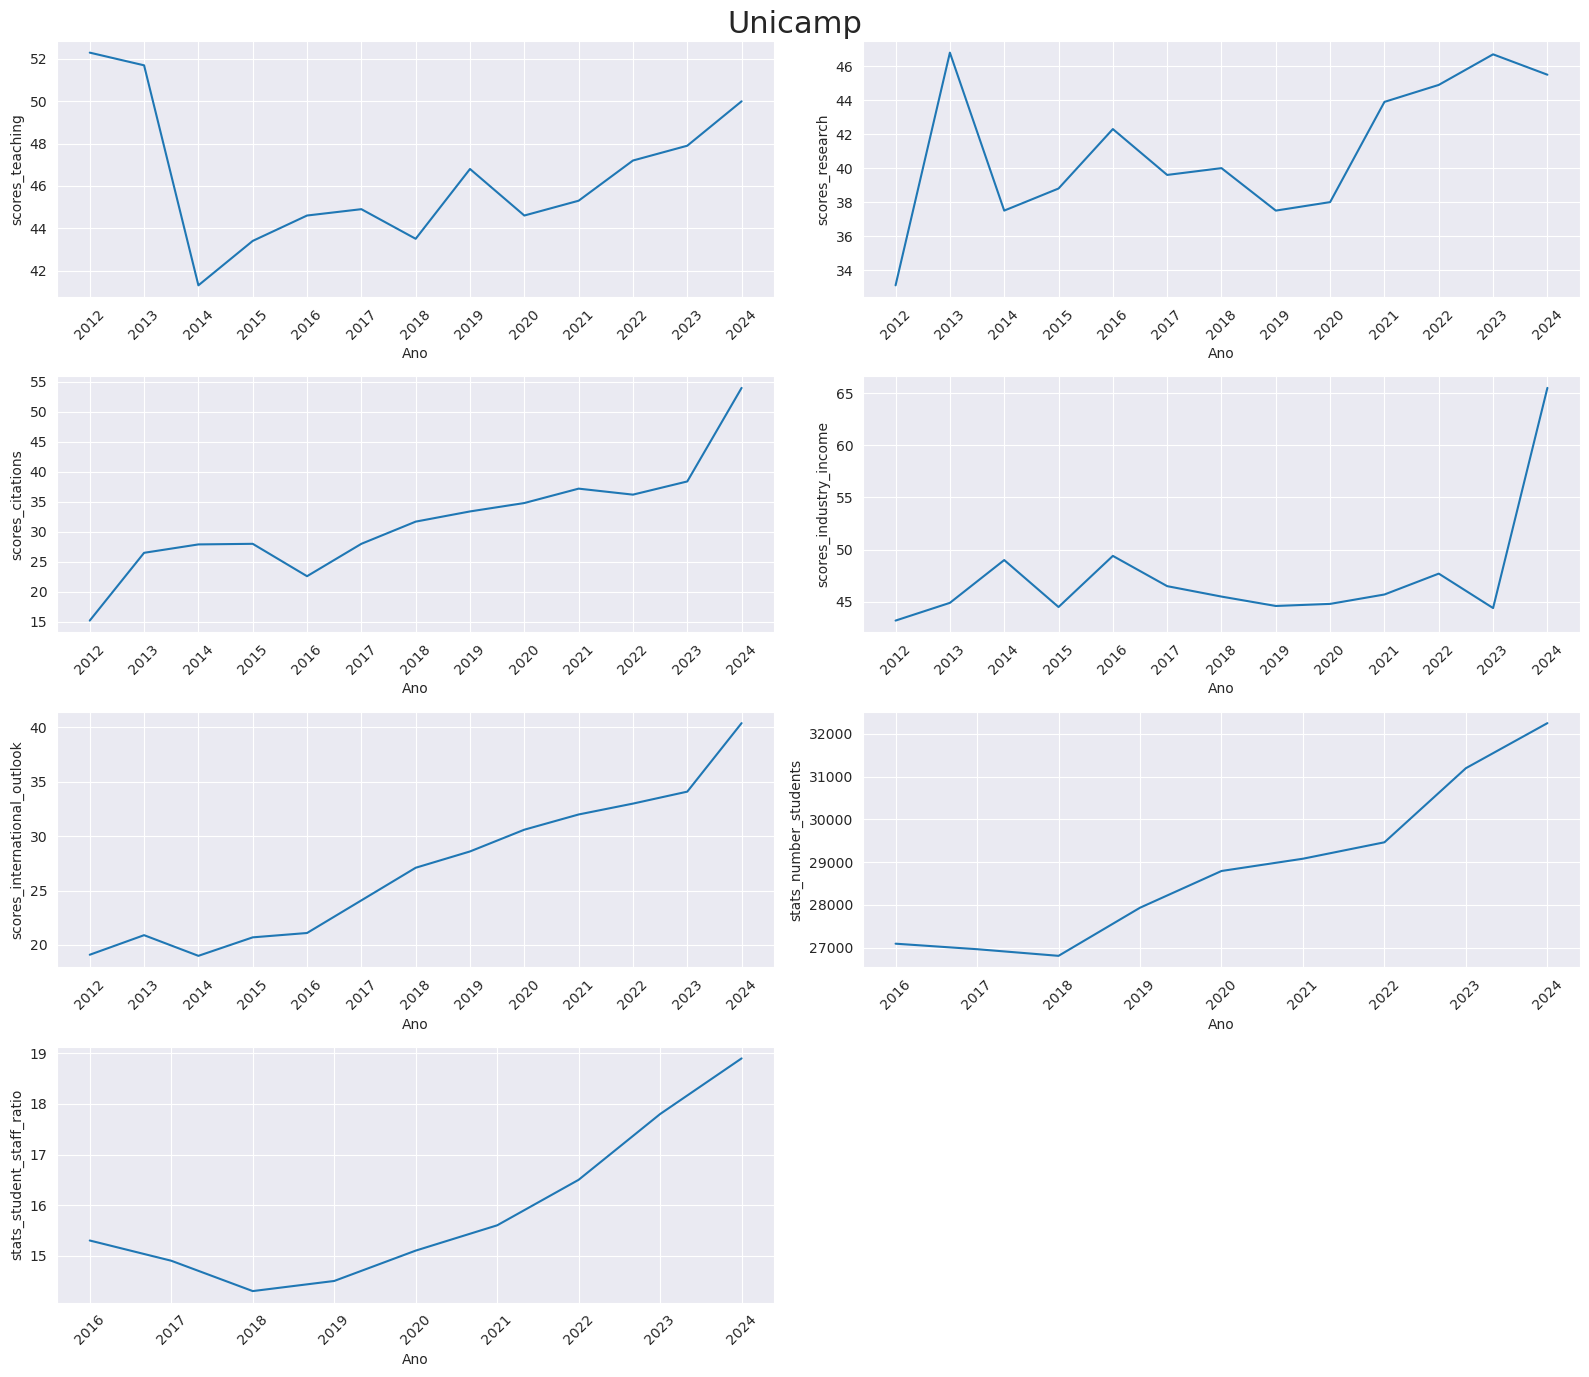

In [226]:
#Plotar a evolução dos fatores da Unicamp
ncols=2
nrows=4
index_indicador=0
#indicadores é uma lista com os indicadores que serão plotados, o index_indicador será usado para selecionar o indicador na lista
fig,axs=plt.subplots(ncols=ncols,sharex=False,nrows=nrows,figsize=(16,14))
fig.suptitle('Unicamp', fontsize=22) #adiciona um título geral para os subplots
plt.subplots_adjust(top=0.96) #controla a distância entre o título geral dos subplots e os primeiros gráficos

for row in range(nrows):
    for col in range(ncols):
        if row==3 and col==1: #último axs no subplot não será usado
            break
        sns.lineplot(data=unicamp,x='Ano',y=indicadores[index_indicador],ax=axs[row,col])
        axs[row,col].tick_params('x', labelrotation=45) 
        index_indicador+=1
fig.delaxes(axs[row][col]) #deletar axs que não foi usado
fig.tight_layout()
#axs[3,0].tick_params('x', labelrotation=45) 


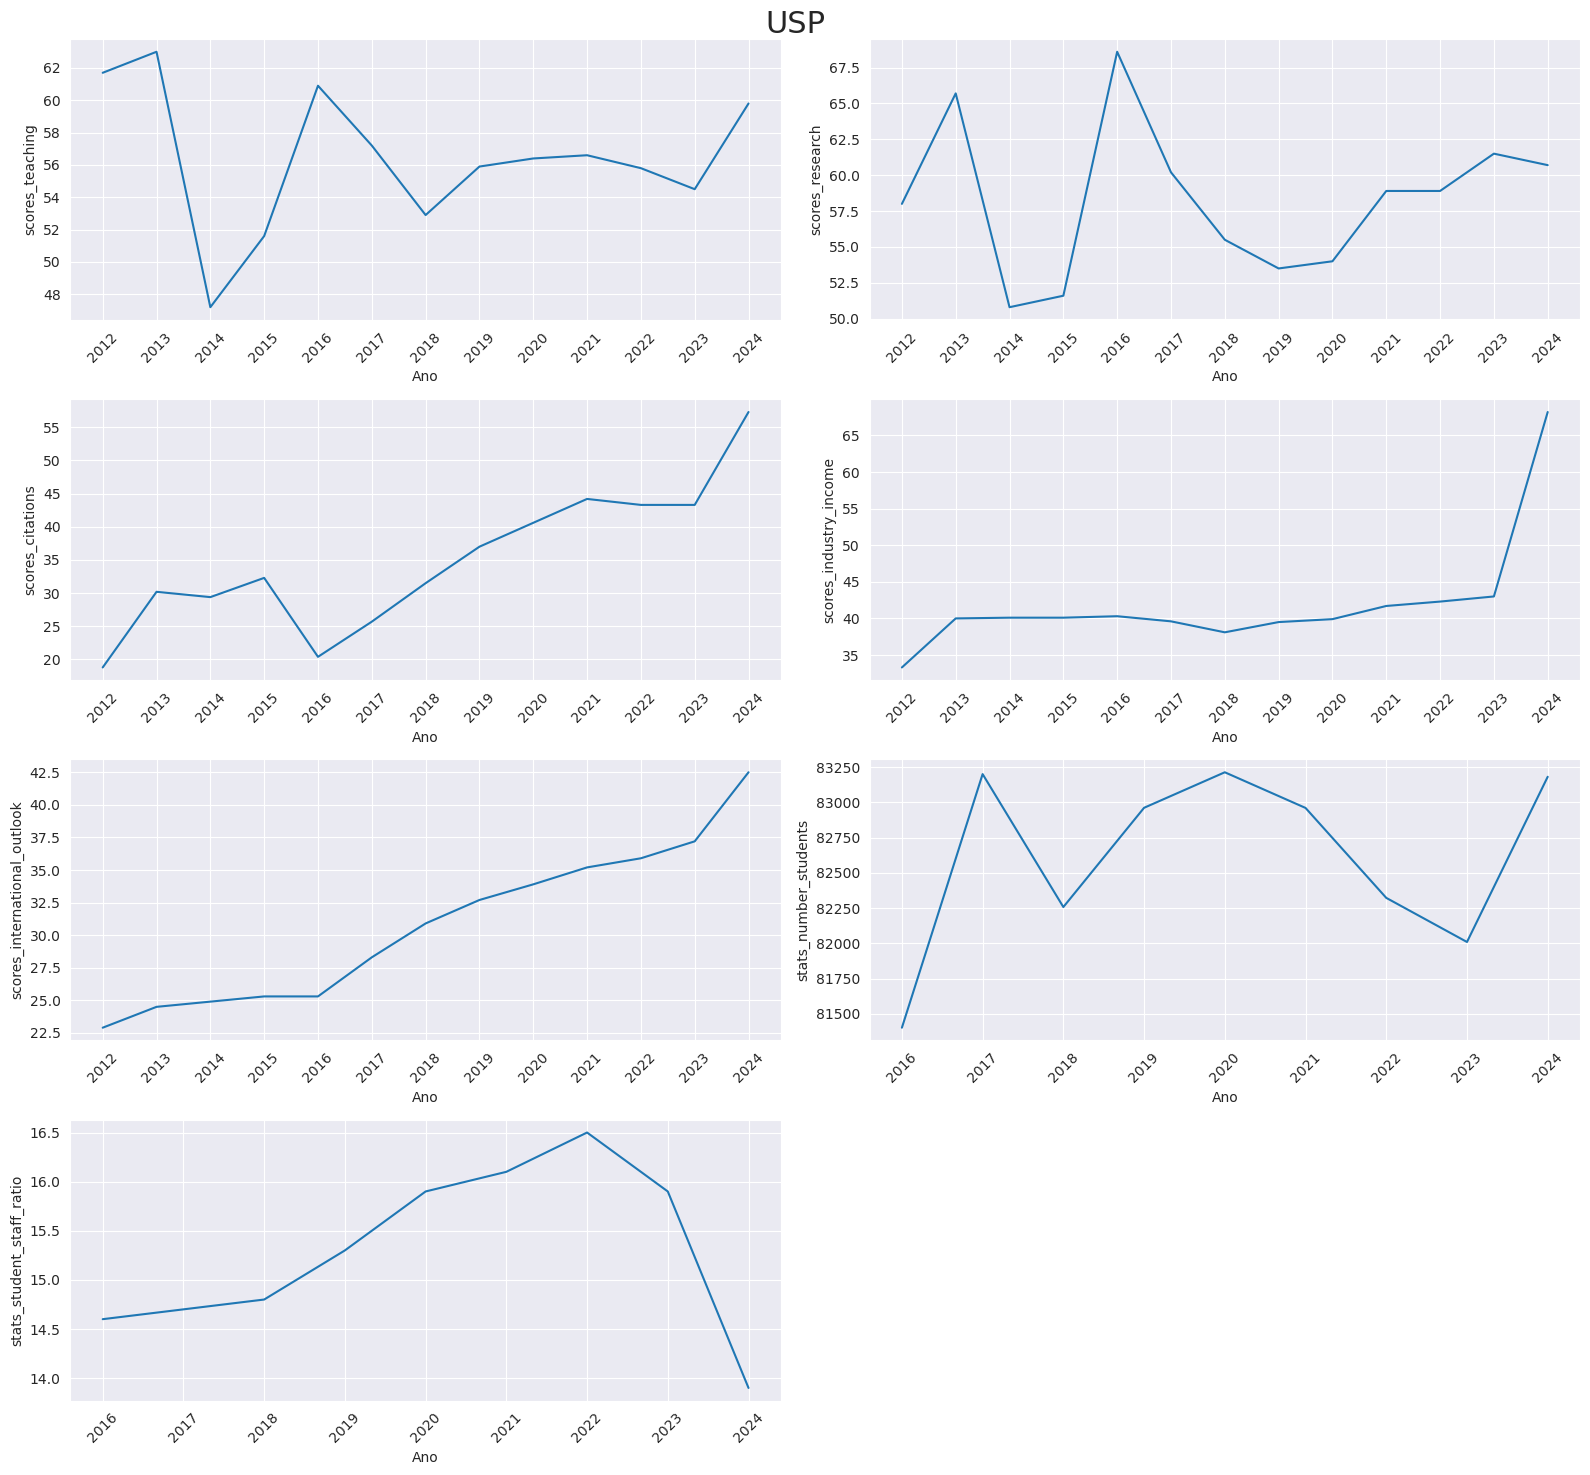

In [227]:
#Plotar a evolução dos fatores da USP

ncols=2
nrows=4
index_indicador=0
#indicadores é uma lista com os indicadores que serão plotados, o index_indicador será usado para selecionar o indicador na lista
fig,axs=plt.subplots(ncols=ncols,sharex=False,nrows=nrows,figsize=(16,15))
fig.suptitle('USP', fontsize=22) #adiciona um título geral para os subplots
for row in range(nrows):
    for col in range(ncols):
        if row==3 and col==1: #último axs no subplot não será usado
            break
        sns.lineplot(data=usp,x='Ano',y=indicadores[index_indicador],ax=axs[row,col])
        axs[row,col].tick_params('x', labelrotation=45) 
        index_indicador+=1
fig.delaxes(axs[row][col]) #remover axs que não foi usado
fig.tight_layout()
#axs[3,0].tick_params('x', labelrotation=45) 

In [228]:
df_dados.head()

rank_order rank                                   name scores_overall  \
2011 0           1    1                     Harvard University           96.1   
     1           2    2     California Institute of Technology           96.0   
     2           3    3  Massachusetts Institute of Technology           95.6   
     3           4    4                    Stanford University           94.3   
     4           5    5                   Princeton University           94.2   

        scores_overall_rank  scores_teaching  scores_teaching_rank  \
2011 0                  1.0             99.7                   1.0   
     1                  2.0             97.7                   4.0   
     2                  3.0             97.8                   3.0   
     3                  4.0             98.3                   2.0   
     4                  5.0             90.9                   6.0   

       scores_international_outlook  scores_international_outlook_rank  \
2011 0                         72.4                               49.0   
     1                         54.6                               93.0   
     2                         82.3                               36.0   
     3                         29.5                              156.0   
     4                         70.3                               53.0   

       scores_industry_income  ...  \
2011 0                   34.5  ...   
     1                   83.7  ...   
     2                   87.5  ...   
     3                   64.3  ...   
     4                      -  ...   

                                         subjects_offered  closed  \
2011 0  Mathematics & Statistics,Civil Engineering,Lan...   False   
     1  Languages, Literature & Linguistics,Economics ...   False   
     2  Mathematics & Statistics,Languages, Literature...   False   
     3  Physics & Astronomy,Computer Science,Politics ...   False   
     4  Languages, Literature & Linguistics,Biological...   False   

        unaccredited  stats_number_students  stats_student_staff_ratio  \
2011 0         False                    NaN                        NaN   
     1         False                    NaN                        NaN   
     2         False                    NaN                        NaN   
     3         False                    NaN                        NaN   
     4         False                    NaN                        NaN   

       stats_pc_intl_students stats_female_male_ratio stats_proportion_of_isr  \
2011 0                    NaN                     NaN                     NaN   
     1                    NaN                     NaN                     NaN   
     2                    NaN                     NaN                     NaN   
     3                    NaN                     NaN                     NaN   
     4                    NaN                     NaN                     NaN   

        male proportion  female proportion  
2011 0              NaN                NaN  
     1              NaN                NaN  
     2              NaN                NaN  
     3              NaN                NaN  
     4              NaN                NaN  

[5 rows x 27 columns]

In [229]:
#Salvar o dataframe com todos os ranking para contrução do comparativo com os rankings publicados por outras instituições

#Remover o multiindex para facilitar 
#O multindex será convertido em uma nova coluna para identificar o ano do ranking
df_dados.reset_index(inplace=True)
df_dados.drop(columns='level_1',inplace=True)
df_dados.rename(columns={'level_0':'Year'},inplace=True)


path_to_save='/home/rodolfo/Insync/rodolfopcruz2@gmail.com/Google Drive/Estudo/Python_Projects/education_data/dados/Comparativo/Rankings/'
df_dados.to_csv(path_to_save+'times_higher_education_rankings.csv',index=False)
